In [228]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [229]:
# 데이터 로딩
taxiDF = pd.read_csv(r'../data/taxi.csv', nrows=50000)
diabetesDF = pd.read_csv(r'../data/diabetes.csv')

# [1] 거리에 따른 택시 요금

In [230]:
# 거리(distance) 항목 추가
taxiDF['distance'] = ((taxiDF['dropoff_longitude'] - taxiDF['pickup_longitude']) ** 2 + (
            taxiDF['dropoff_latitude'] - taxiDF['pickup_latitude']) ** 2) ** 0.5

# 이상치 제거
taxiDF = taxiDF[taxiDF['distance'] < 1]
# taxiDF = taxiDF[-74.27 < taxiDF['pickup_longitude'] < -73.68]

In [231]:
taxiDF

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,0.045782
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.008049
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,0.020574
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.007686


In [232]:
# 훈련, 테스트 세트 분리
taxi_train_input, taxi_test_input, taxi_train_target, taxi_test_target = train_test_split(
    np.array(taxiDF['distance']), np.array(taxiDF['fare_amount']), random_state=42)

# 2차원 배열로 변경
taxi_train_input = taxi_train_input.reshape(-1, 1)
taxi_test_input = taxi_test_input.reshape(-1, 1)

# 다항식을 위한 준비
taxi_train_poly = np.column_stack((taxi_train_input ** 2, taxi_train_input))
taxi_test_poly = np.column_stack((taxi_test_input ** 2, taxi_test_input))

In [233]:
# 선형 회귀 모델 생성
taxi_lr = LinearRegression()
taxi_lr.fit(taxi_train_poly, taxi_train_target)

LinearRegression()

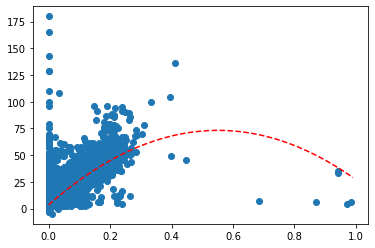

In [234]:
# 산점도 및 회귀선 그래프 그리기
point = np.arange(0, 1, 0.01)
plt.scatter(taxi_train_input, taxi_train_target)
plt.plot(point, -229.39147849 * point ** 2 + 252.92258651 * point + 3.464853350443641,
         color='red', linestyle='--')
plt.show()

In [235]:
# 모델을 바탕으로 예측
pre = taxi_lr.predict([[0.2 ** 2, 0.2]])
print('예측결과 :', pre[0], '$')

예측결과 : 44.8737115135293 $


# [2] 당뇨병 발병 확률

In [236]:
diabetesDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [237]:
# 변수들 끼리의 상관관계 분석(Glucose, BMI, Age가 관계있는걸로 보임)
pd.DataFrame.corr(diabetesDF)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [238]:
# 학습, 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    diabetesDF[['Glucose', 'BMI', 'Age']], diabetesDF['Outcome'], random_state=42, test_size=0.4)

In [239]:
# 모델 생성
model = LogisticRegression()
model.fit(train_input, train_target)

LogisticRegression()

In [240]:
# 생성된 모델 기반으로 예측하고 확률보기(변수 Glucose, BMI, Age)
preY = model.predict([[130, 30, 80]])
print('예측결과 :', preY)

probaY = model.predict_proba([[130, 30, 80]])
print("분류 종류 :", model.classes_)
print("예측확률 :", probaY)
print(f'당뇨병 발병 확률이 {np.round(probaY[0][1] * 100, 2)}% 입니다')

예측결과 : [1]
분류 종류 : [0 1]
예측확률 : [[0.2263406 0.7736594]]
당뇨병 발병 확률이 77.37% 입니다


C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\EV_PY37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
